---
# Written by Usama Azhar.
# usamaazhar261@gmail.com
---

### Performing the Task 1: Dataset Selection and Exploration
- Search for a time series dataset with a continuous target variable from reputable sources (e.g., 
Kaggle, UCI Machine Learning Repository, government databases).
- The dataset should have at least 1000 data points and multiple features.
- The target variable should be `continuous`.
- Perform initial `Exploratory Data Analysis`, including `summary statistics` and `data visualizations`.
- In your report, provide a comprehensive description of the chosen dataset.
- Justify your choice of dataset in your report.

In [1]:
# Importing the Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

In [2]:
# Importing the dataset
df = yf.download('TSLA', start='2010-06-29', end='2023-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [4]:
# My Current column names are Tuples
print('Original columns:' , df.columns)
# Creating a new list of names by taking the first item(Only Choosing Close, High, Low...) 
new_column_names = [col[0] for col in df.columns]
# Assign the new clean list of names to my dataframe
df.columns = new_column_names
# Checking the result
print('\nNew Columns:', df.columns)

Original columns: MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

New Columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [5]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [6]:
# Creating the dictionary for changing column names
renamed_dict = {
    'Close': 'Closing Price',
    'High': 'Daily High',
    'Low': 'Daily Low',
    'Open': 'Daily Open',
    'Volume': 'Volume'
}

df_renamed_columns = df.rename(columns=renamed_dict)

print(df_renamed_columns.head())

            Closing Price  Daily High  Daily Low  Daily Open     Volume
Date                                                                   
2010-06-29       1.592667    1.666667   1.169333    1.266667  281494500
2010-06-30       1.588667    2.028000   1.553333    1.719333  257806500
2010-07-01       1.464000    1.728000   1.351333    1.666667  123282000
2010-07-02       1.280000    1.540000   1.247333    1.533333   77097000
2010-07-06       1.074000    1.333333   1.055333    1.333333  103003500


In [7]:
df_renamed_columns.head()

,Closing Price,Daily High,Daily Low,Daily Open,Volume
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [8]:
# Reseting the index, So i can preserve the Date Column
df_with_date_column = df_renamed_columns.reset_index()
# cross verifying
print("DataFrame after resetting index:")
print(df_with_date_column.head())
# Saving the dataset 
file_name = 'Stock_Data.csv'
df_with_date_column.to_csv(file_name, index=False)

DataFrame after resetting index:
        Date  Closing Price  Daily High  Daily Low  Daily Open     Volume
0 2010-06-29       1.592667    1.666667   1.169333    1.266667  281494500
1 2010-06-30       1.588667    2.028000   1.553333    1.719333  257806500
2 2010-07-01       1.464000    1.728000   1.351333    1.666667  123282000
3 2010-07-02       1.280000    1.540000   1.247333    1.533333   77097000
4 2010-07-06       1.074000    1.333333   1.055333    1.333333  103003500


In [9]:
Data = pd.read_csv('Stock_Data.csv')
Data.head()

,Date,Closing Price,Daily High,Daily Low,Daily Open,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [10]:
Data.tail()

,Date,Closing Price,Daily High,Daily Low,Daily Open,Volume
3395,2023-12-22,252.539993,258.220001,251.369995,256.760010,93249800
3396,2023-12-26,256.609985,257.970001,252.910004,254.490005,86892400
3397,2023-12-27,261.440002,263.339996,257.519989,258.350006,106494400
3398,2023-12-28,253.179993,265.130005,252.710007,263.660004,113619900
3399,2023-12-29,248.479996,255.190002,247.429993,255.100006,100615300


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3400 non-null   object 
 1   Closing Price  3400 non-null   float64
 2   Daily High     3400 non-null   float64
 3   Daily Low      3400 non-null   float64
 4   Daily Open     3400 non-null   float64
 5   Volume         3400 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 159.5+ KB


In [12]:
# Summary Statistics

Data.describe()

,Closing Price,Daily High,Daily Low,Daily Open,Volume
count,3400.000000,3400.000000,3400.000000,3400.000000,3.400000e+03
mean,70.474242,72.048393,68.819973,70.493993,9.681167e+07
std,101.480831,103.824949,99.066386,101.559061,8.004848e+07
min,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,10.779833,11.014167,10.417333,10.722500,4.598775e+07
50%,16.928666,17.218667,16.679334,16.944000,8.122500e+07
75%,108.349998,111.962500,104.220999,109.584000,1.235249e+08
max,409.970001,414.496674,405.666656,411.470001,9.140820e+08


In [79]:
Data.shape

(3400, 6)

In [80]:
Data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [81]:
Data.dtypes

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [13]:
# Date Column dtype is Object
# I convert it Datetime 'to Calender Dates'

Data['Date'] = pd.to_datetime(Data['Date'], errors='coerce')
# Errors coerce means if it were not able to convert into Date, it will put a Nat(Not a time) value

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3400 non-null   datetime64[ns]
 1   Closing Price  3400 non-null   float64       
 2   Daily High     3400 non-null   float64       
 3   Daily Low      3400 non-null   float64       
 4   Daily Open     3400 non-null   float64       
 5   Volume         3400 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 159.5 KB


In [84]:
# There are no missing/null values in our dataset
Data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [15]:
# Playing the Detective part 
# Choosing my Target Variable(Continous Variable)
target_variable = 'Closing Price'

In [16]:
# Checking if the Target Variable exists or not 
# target_variable is 'Closing Price' column
target_variable in Data.columns

True

In [87]:
# https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_datetime64_any_dtype.html
# from pandas.api.types import is_datetime64_any_dtype
# from pandas.core.dtypes.dtypes import DatetimeTZDtype

In [88]:
#if 'Date' in Data.columns and pd.api.types.is_datetime64_dtype_any_dtype(Data['Date']):
#    print('True')
#else:
#    print('Its not there')

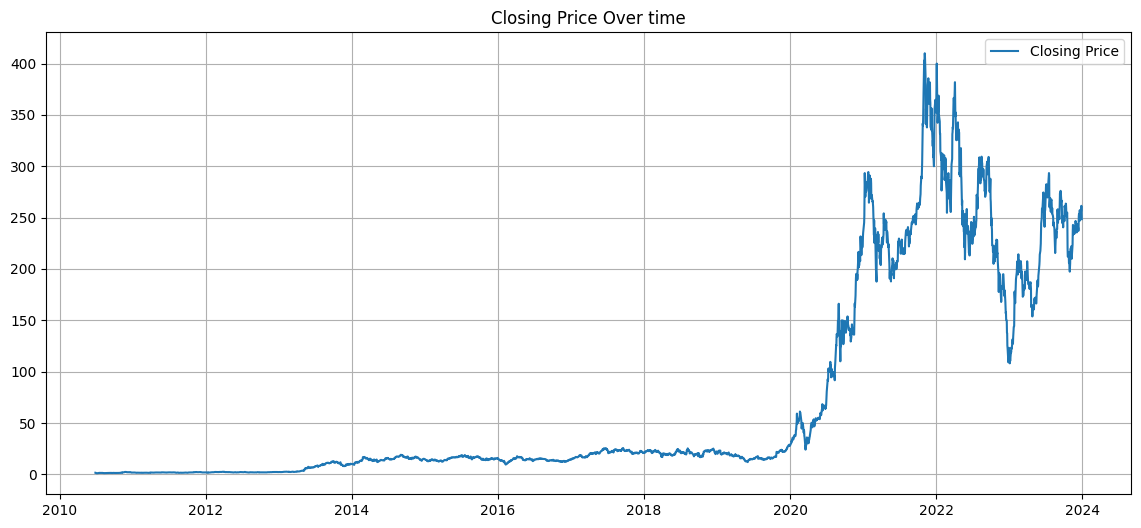

In [21]:
if 'Date' in Data.columns and target_variable in Data.columns and pd.api.types.is_datetime64_any_dtype(Data['Date']):
    plt.figure(figsize=(14,6)) # Making the picture bigger
    plt.plot(Data['Date'], Data[target_variable], label=f'{target_variable}')
    plt.title(f'{target_variable} Over time') 
    plt.xlabel=('Date')
    plt.ylabel=('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

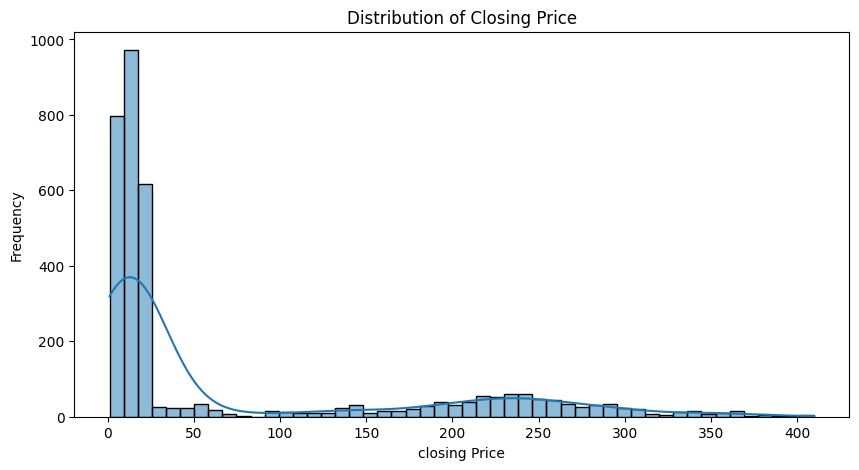

In [17]:
# Histogram of the target variable.
# This shows us how often different price ranges appear.
if target_variable in Data.columns and pd.api.types.is_numeric_dtype(Data[target_variable]):
        plt.figure(figsize=(10, 5))
        sns.histplot(Data[target_variable], kde=True, bins=50) # kde=True adds a smooth line
        plt.title(f'Distribution of {target_variable}')
        plt.xlabel('closing Price')
        plt.ylabel('Frequency')
        plt.show()

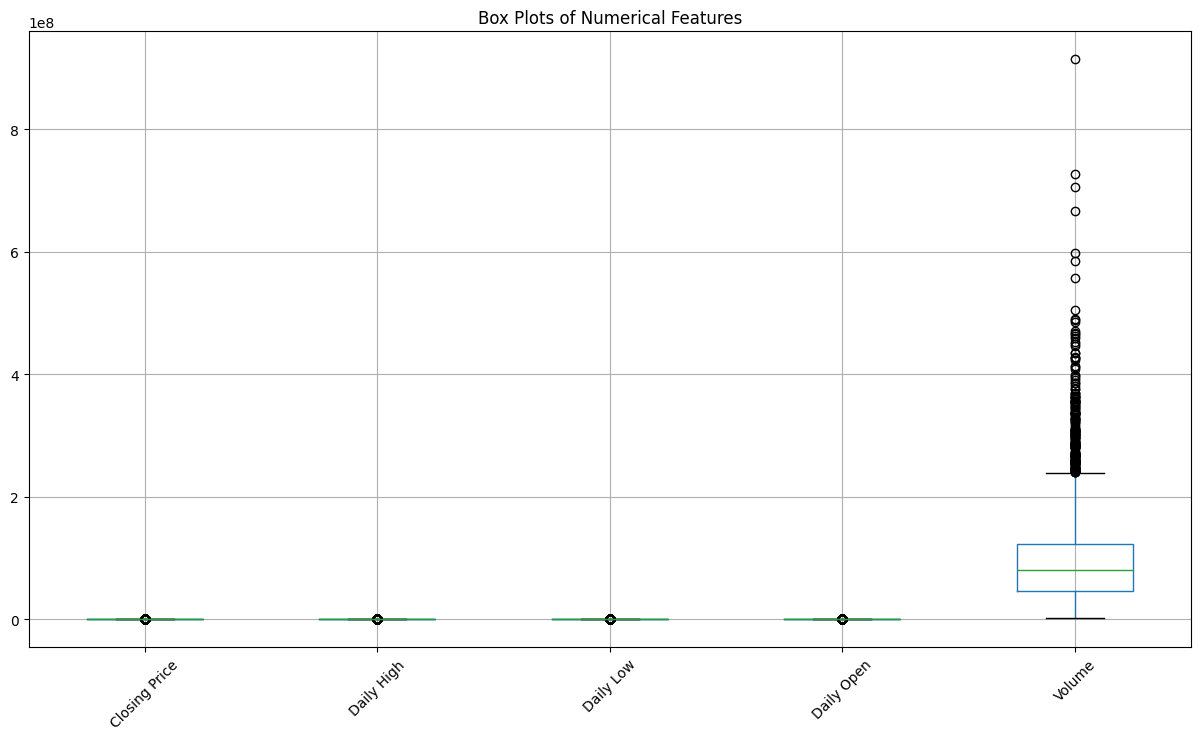

In [20]:
# Box plots for numerical features to see distributions and potential outliers.
# Imagine a box that holds the middle 50% of your data. The line in the middle is the median (middle value).
# The "whiskers" (lines sticking out) show the range, and dots outside are potential "outliers" (unusual values).
numerical_cols = Data.select_dtypes(include=np.number).columns.tolist()
if numerical_cols:
        plt.figure(figsize=(15, 8))
        Data[numerical_cols].boxplot()
        plt.title('Box Plots of Numerical Features')
        plt.xticks(rotation=45) # Rotate labels if they overlap
        plt.show()